## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [21]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

import os
import warnings



warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [3]:
customer_set = pd.read_csv("Mall_Customers.csv")
customer_set = customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})
customer_set

,CustomerID,Gender,Age,Income,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [5]:
print(customer_set.columns, end="\n\n")
print(customer_set.shape, end="\n\n")
print(customer_set.dtypes)

Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

(200, 5)

CustomerID        int64
Gender           object
Age               int64
Income            int64
SpendingScore     int64
dtype: object


In [6]:
customer_set.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
SpendingScore,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
customer_set.isna().sum()

CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64

## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [8]:
customer_set = customer_set.drop({"CustomerID"}, axis=1)
customer_set

,Gender,Age,Income,SpendingScore
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

<Axes: xlabel='SpendingScore', ylabel='Count'>

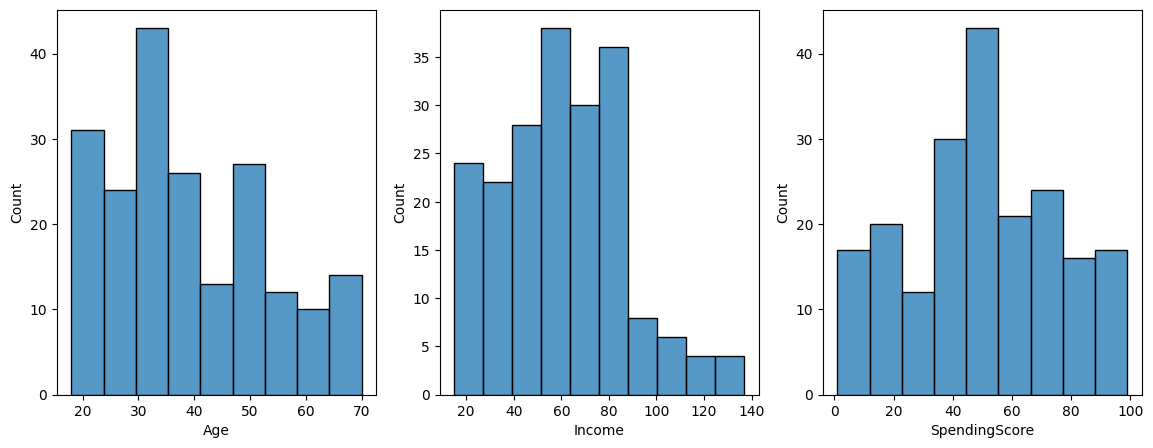

In [9]:
_, axis = plt.subplots(ncols=3, nrows=1, figsize=(14, 5))

sns.histplot(data=customer_set, x="Age", ax=axis[0])
sns.histplot(data=customer_set, x="Income", ax=axis[1])
sns.histplot(data=customer_set, x="SpendingScore", ax=axis[2])

**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

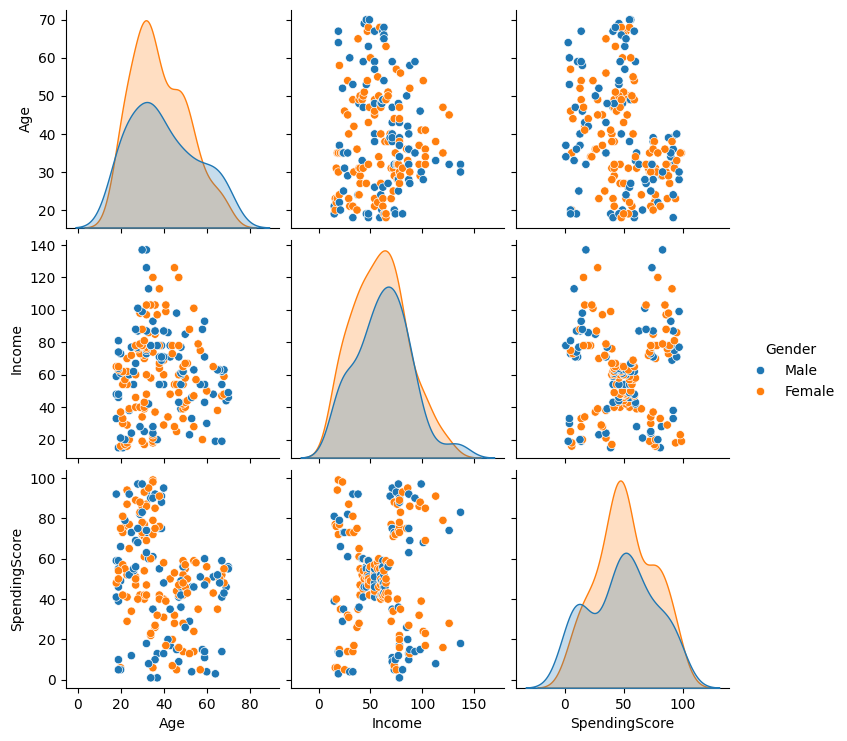

In [10]:
sns.pairplot(data=customer_set, hue="Gender", vars=["Age", "Income", "SpendingScore"])
plt.show()

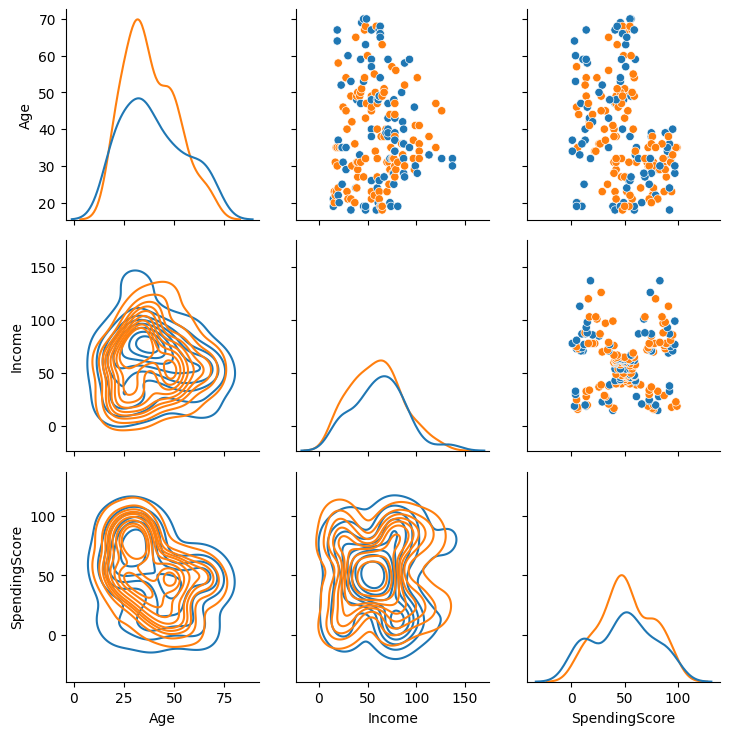

In [11]:
pairGrid = sns.PairGrid(data=customer_set, hue="Gender", vars=["Age", "Income", "SpendingScore"])
pairGrid.map_upper(sns.scatterplot)
pairGrid.map_diag(sns.kdeplot)
pairGrid.map_lower(sns.kdeplot, lw=1)
plt.show()

**Висновки з 1-4 завдання (детальні)**

1.   Ми завантажили датасет і провели його первинний аналіз, вивчивши розмірність, типи даних та перевіривши наявність нульових значень. Ми отримали основну статистику за числовими змінними, включаючи квартилі, мінімальні та максимальні значення. Змінили назви змінних "Annual Income (k$)" на "Income" та "Spending Score (1-100)" на "SpendingScore" для спрощення подальшого аналізу.
2.   Атрибут CustomerID було видалено, оскільки він не має значення для нашого аналізу.
3. Ми створили діаграми розподілу для змінних Age, Income та SpendingScore, які наближені до нормального розподілу. Середній вік покупців становить від 20 до 40 років, з доходом від 50 до 80 тисяч доларів на рік та показником витрат у діапазоні 60-80 (%).
4. З додаткових графіків ми з'ясували, що доходи чоловіків нижчі, а також нижчі їх витрати порівняно з жінками. Аналізуючи залежність Income від SpendingScore, можна припустити наявність приблизно п'яти класів. Однак, вивчаючи залежність між SpendingScore та Age, можна визначити три потенційні кластери. Далі ми проведемо детальніший аналіз для точного визначення кількості кластерів.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Female: 56.00000000000001%
Male: 44.0%


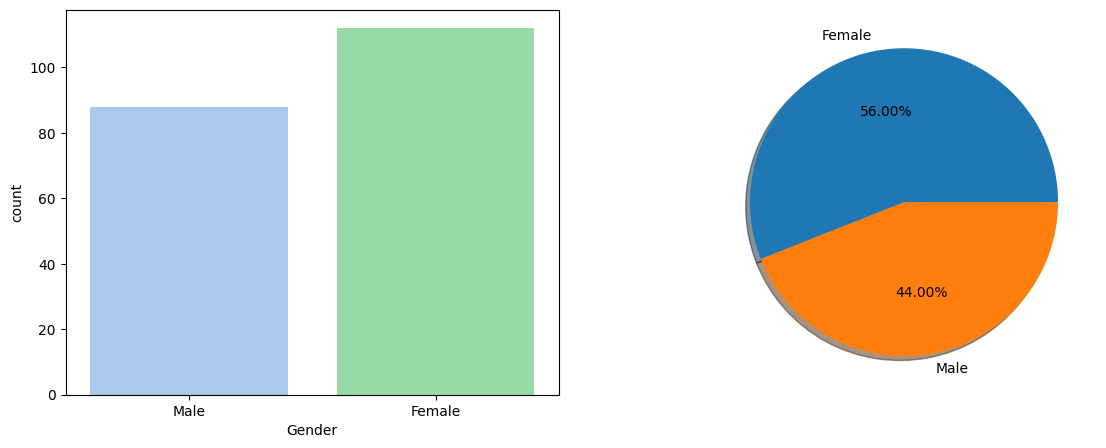

In [12]:
_, axes = plt.subplots(ncols=2, figsize=(14, 5))

print(f'Female: {(customer_set["Gender"].value_counts(normalize=True) * 100).iloc[0]}%')
print(f'Male: {(customer_set["Gender"].value_counts(normalize=True) * 100).iloc[1]}%')

sns.countplot(data=customer_set, x="Gender", palette='pastel6', ax=axes[0])
axes[1].pie(x=customer_set["Gender"].value_counts(), autopct='%0.2f%%', shadow=True, labels=["Female", "Male"])
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

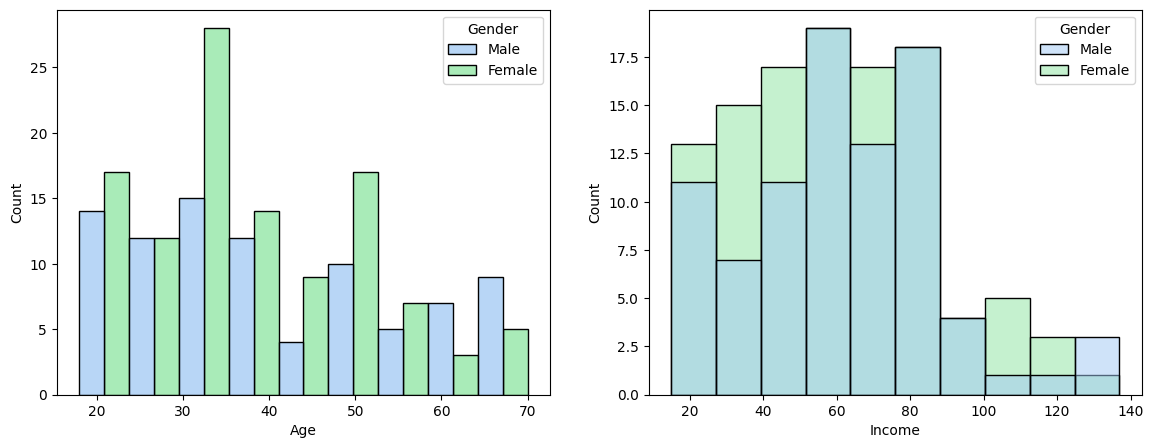

In [13]:
_, axes = plt.subplots(ncols=2, figsize=(14, 5))

sns.histplot(data=customer_set, x="Age", hue="Gender", palette='pastel6', ax=axes[0], multiple='dodge')
sns.histplot(data=customer_set, x="Income", hue="Gender", palette='pastel6', ax=axes[1], multiple='layer')
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



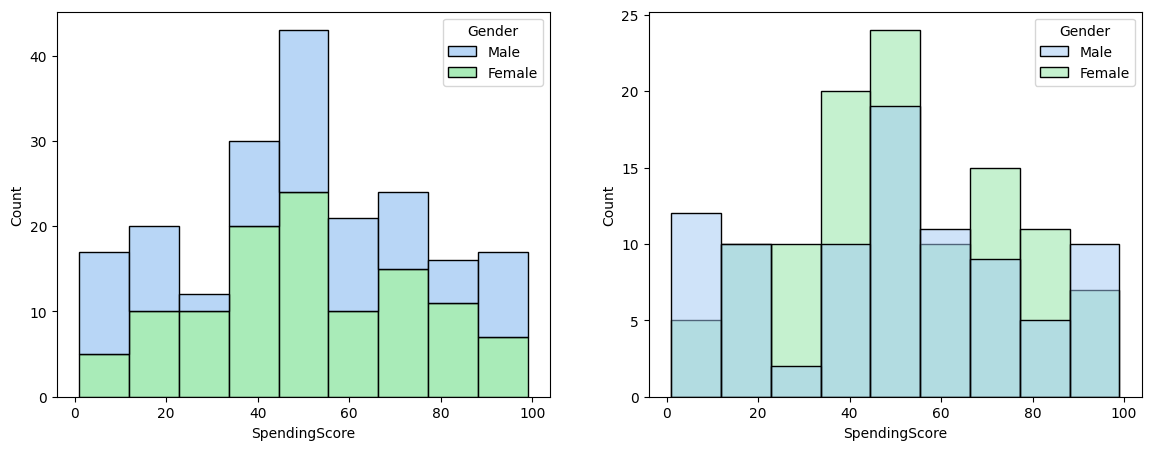

In [14]:
_, axes = plt.subplots(ncols=2, figsize=(14, 5))

sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", palette='pastel6', multiple='stack', ax=axes[0])
sns.histplot(data=customer_set, x="SpendingScore", hue="Gender", palette='pastel6', multiple='layer', ax=axes[1])
plt.show()

**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

<Axes: xlabel='SpendingScore'>

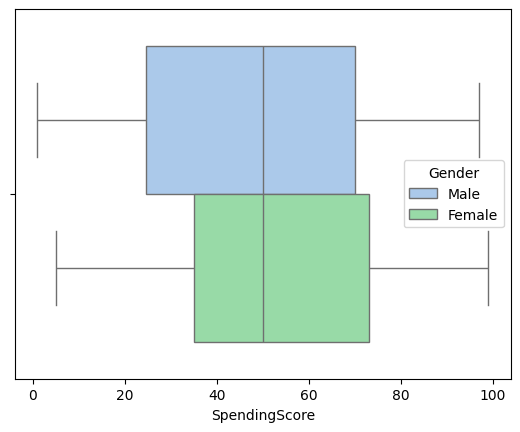

In [15]:
sns.boxplot(data=customer_set, x="SpendingScore", hue="Gender", palette='pastel6')

**Висновки з завдання 5 - 8(детальні)**

1.   Яке співвідношення груп чоловіків та жінок?(За результатами використання функції value_counts() можна встановити, що в даній вибірці присутня більша кількість жінок порівняно з чоловіками: 112 жінок проти 88 чоловіків.)
2.  Подивитись які можна виділити групи і як розподілені витрати відностно статі людини? (Гістограми за змінними Age та Income, які представлені за статтю, показують рівномірний розподіл чоловіків та жінок за віковими категоріями та рівнем доходів. Однак, відсутність даних про витрати за статтю унеможливлює детальний аналіз розподілу витрат. Для аналізу цієї характеристики необхідно використовувати змінну SpendingScore, розбиту за статтю. )
3. Чи є різниця між витратами у чоловіків та жінок?(Аналізуючи змінну SpendingScore, поділену за статтю, можна виявити значні відмінності у рівнях витрат між чоловіками та жінками. Зокрема, жінки, як правило, витрачають більше, що може вказувати на різницю у споживчих звичках між статями.)
4. Загалом, жінки мають вищий середній рівень витрат порівняно з чоловіками.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що ... **Чому?**;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

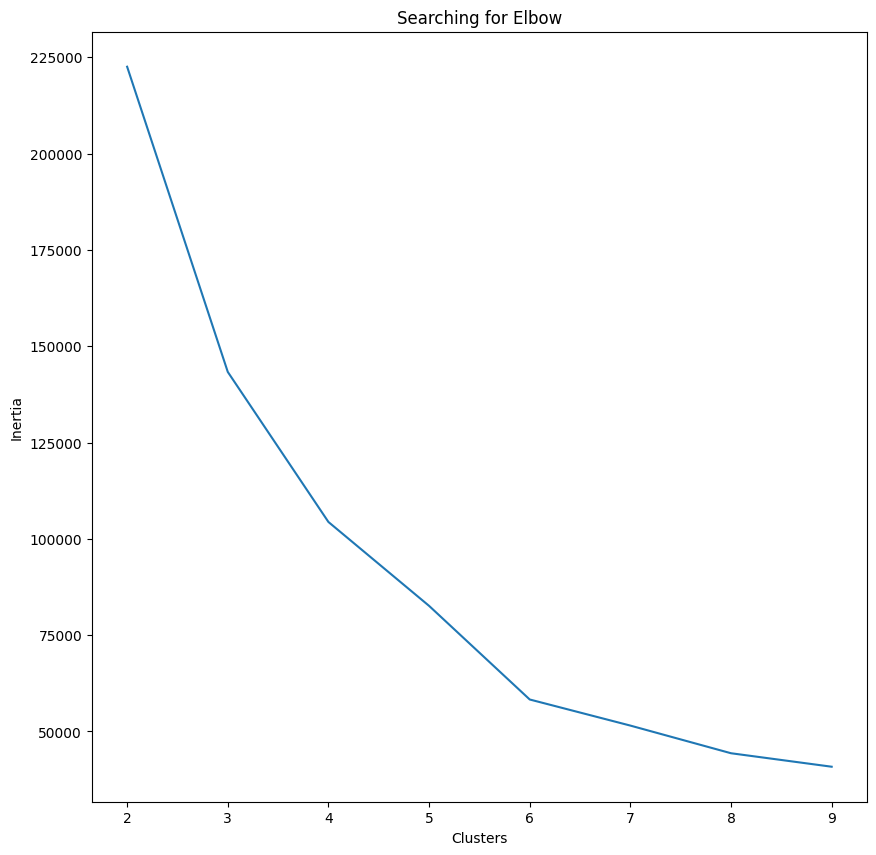

In [16]:
X = customer_set.drop(['Gender'], axis=1)
clusters = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=101)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x=list(range(2, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')


plt.show()

**Висновки з завдання 9 (детальні)** 

Кластеризація даних була виконана за допомогою алгоритму k-means, причому аналіз здійснювався без врахування статі.

* Для визначення найкращої кількості кластерів ми побудували графік, на якому представлено залежність інерції від кількості кластерів, варіюючись від 1 до 10.
* Графік ілюструє, як інерція зменшується із зростанням кількості кластерів, проте після досягнення певної кількості кластерів, зменшення інерції стає менш значним.
* Оптимальну кількість кластерів можна визначити, виявивши точку "ліктя" на графіку, де спостерігається різке зменшення інерції, за яким слідує її стабілізація.

На мою думку, 5 або 6 кластери є оптимальною кількістю для цих даних, оскільки саме в цих точках відбувається значне зменшення інерції, після чого вона вирівнюється.

**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

<Axes: xlabel='Income', ylabel='SpendingScore'>

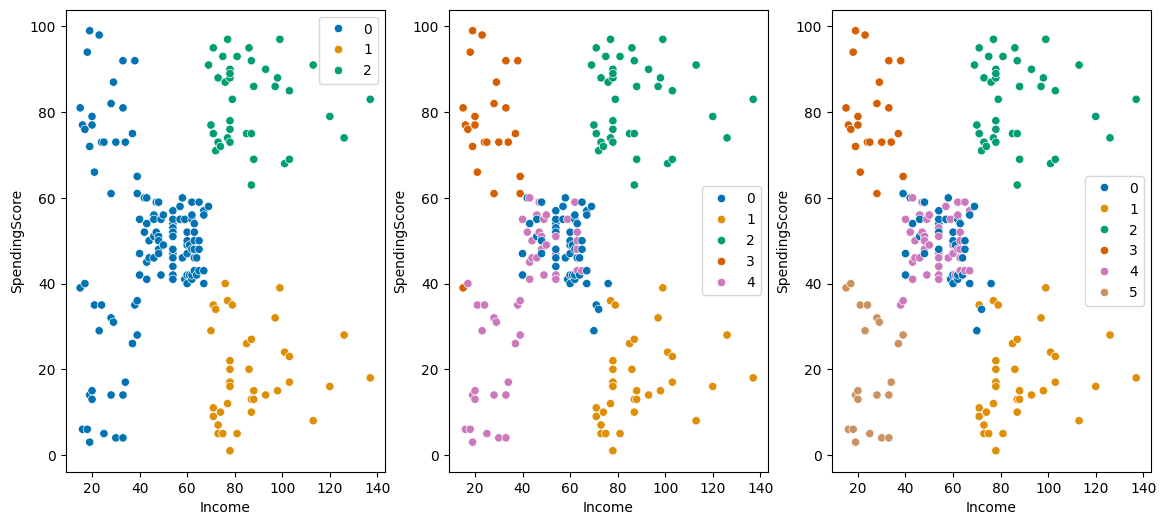

In [17]:
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=101)
kmeans_5 = KMeans(n_clusters=5, init='k-means++', random_state=101)
kmeans_6 = KMeans(n_clusters=6, init='k-means++', random_state=101)

kmeans_3.fit(X)
kmeans_5.fit(X)
kmeans_6.fit(X)

_, axes = plt.subplots(ncols=3, figsize=(14, 6))
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=kmeans_3.labels_, palette='colorblind', ax=axes[0])
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=kmeans_5.labels_, palette='colorblind', ax=axes[1])
sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=kmeans_6.labels_, palette='colorblind', ax=axes[2])

**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [18]:


fig_5_clusters = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Age', color=kmeans_5.labels_,
                                symbol=kmeans_5.labels_, opacity=0.8)
fig_6_clusters = px.scatter_3d(customer_set, x='Income', y='SpendingScore', z='Age', color=kmeans_6.labels_,
                                symbol=kmeans_6.labels_, opacity=0.8)

fig_5_clusters.update_layout(width=800, height=600)
fig_6_clusters.update_layout(width=800, height=600)

fig_5_clusters.show()
fig_6_clusters.show()

**Висновки з завдання 10 - 11 (детальні)** 

1.   На трьох графіках представлено розподіл даних на 3, 5 і 6 кластерів. З цих візуалізацій очевидно, що розподіл на три кластери є недостатнім. Варіант з п'ятьма кластерами здається більш правдоподібним, але шість кластерів привертає увагу особливою особливістю: один із середніх кластерів поділений на два, які не є лінійно відокремленими. Це спонукає до додаткового дослідження шести кластерів через 3D візуалізацію, щоб краще зрозуміти їхнє просторове розміщення.
2. Подальший аналіз з використанням 3D візуалізації підтверджує валідність гіпотези про шість кластерів. У тривимірному просторі зазначений середній кластер розділяється на дві чітко відокремлені групи, чого не було видно на попередніх 2D візуалізаціях. Таким чином, на мій погляд, розподіл на шість кластерів є найбільш оптимальним для цього набору даних.


## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


In [19]:
numeric_data = customer_set.drop(['Gender'], axis=1)

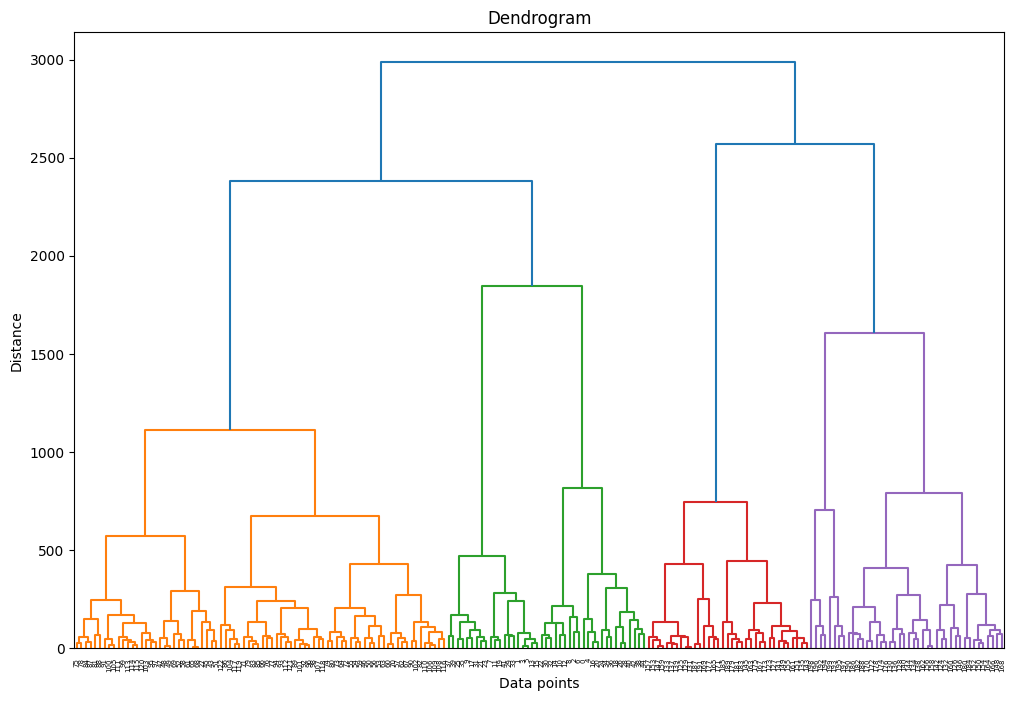

In [23]:
matrix = distance_matrix(numeric_data.values, numeric_data.values)

agglomerative_clustering = AgglomerativeClustering(n_clusters=6,  linkage='ward')
agglomerative_labels = agglomerative_clustering.fit_predict(numeric_data)

plt.figure(figsize=(12, 8))
dendrogram = hierarchy.dendrogram(hierarchy.linkage(matrix, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()


**Висновки з завдання 12 (детальні)**

1. Після тренування моделі з використанням агломеративного кластерування, ми створили дендрограму для шести кластерів. На дендрограмі видно п'ять кластерів, проте я дотримуюсь думки, що оптимальна кількість кластерів становить 6. Наступним кроком буде порівняння методів k-Means і агломеративного кластерування для визначення найкращої моделі для наших даних.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

Text(0.5, 1.0, 'Agglomerative clustering')

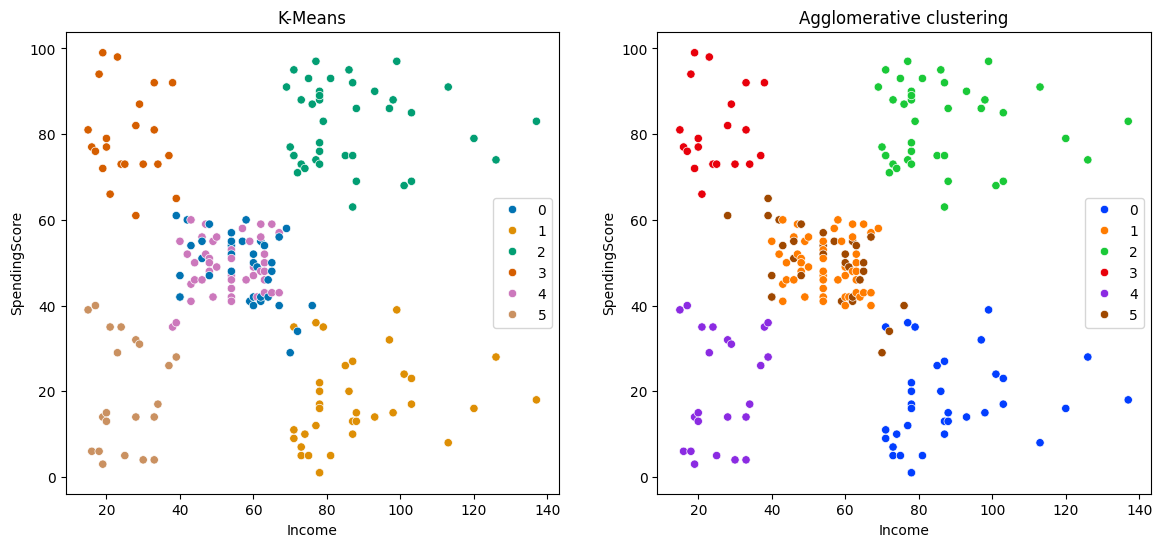

In [24]:
_, axes = plt.subplots(ncols=2, figsize=(14, 6))

sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=kmeans_6.labels_, palette='colorblind', ax=axes[0])
axes[0].set_title("K-Means")

sns.scatterplot(data=customer_set, x='Income', y='SpendingScore', hue=agglomerative_labels, palette='bright', ax=axes[1])
axes[1].set_title("Agglomerative clustering")


**Висновки з завдання 13 (детальні)**

1. На вашу думку, метод k-Means виявився трохи ефективнішим порівняно з Agglomerative Clustering. У агломеративному кластеруванні два центральних кластери включили додаткові точки з сусідніх кластерів, що спричинило збільшення похибки. У випадку з k-Means, хоча аналогічна ситуація теж мала місце, похибка виявилась меншою. Таким чином, за результатами вашого аналізу, метод k-Means з 6 кластерами був визначений як найбільш вдала опція для цього набору даних.